In [52]:
# LoL analysis code
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import json
sns.set_style('darkgrid')

# Use this in notebook to show plots
%matplotlib inline


In [53]:
data = pd.read_csv('./games.csv')
data.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [54]:
def idToName(ID, dic):

    champ = dic['name'][ID]
    return champ

def getTag(name, data):
    
    tags = data['tags'][name][0]
    return tags

def numToColor(data):
    
    if data == 0:
        color = 'blue'
    else:
        color = 'red'
    return color

In [55]:
jDict = pd.read_json('./champion_info_2.json')
champInfo = pd.read_json((jDict['data']).to_json(), orient='index')
champInfo.head()

,id,key,name,tags,title
Aatrox,266,Aatrox,Aatrox,"[Fighter, Tank]",the Darkin Blade
Ahri,103,Ahri,Ahri,"[Mage, Assassin]",the Nine-Tailed Fox
Akali,84,Akali,Akali,[Assassin],the Fist of Shadow
Alistar,12,Alistar,Alistar,"[Tank, Support]",the Minotaur
Amumu,32,Amumu,Amumu,"[Tank, Mage]",the Sad Mummy


In [56]:
spellJson = pd.read_json('./summoner_spell_info.json')
spellInfo = pd.read_json((spellJson['data']).to_json(),orient='index')
spellInfo.head()

,description,id,key,name,summonerLevel
1,Removes all disables (excluding suppression an...,1,SummonerBoost,Cleanse,6
11,Deals 390-1000 true damage (depending on champ...,11,SummonerSmite,Smite,10
12,"After channeling for 4.5 seconds, teleports yo...",12,SummonerTeleport,Teleport,6
13,Restores 50% of your champion's maximum Mana. ...,13,SummonerMana,Clarity,1
14,"Ignites target enemy champion, dealing 70-410 ...",14,SummonerDot,Ignite,10


In [57]:
champInfo.set_index(['id'], inplace=True)
champInfo.head()

,key,name,tags,title
id,,,,
266,Aatrox,Aatrox,"[Fighter, Tank]",the Darkin Blade
103,Ahri,Ahri,"[Mage, Assassin]",the Nine-Tailed Fox
84,Akali,Akali,[Assassin],the Fist of Shadow
12,Alistar,Alistar,"[Tank, Support]",the Minotaur
32,Amumu,Amumu,"[Tank, Mage]",the Sad Mummy


In [58]:
champCols = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id',
             't2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']
banCols = ['t1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5',
             't2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5',]
sumSpellsCols = ['t1_champ1_sum1','t1_champ1_sum2','t1_champ2_sum1','t1_champ2_sum2','t1_champ3_sum1','t1_champ3_sum2',
                 't1_champ4_sum1','t1_champ4_sum2','t1_champ5_sum1','t1_champ5_sum2','t2_champ1_sum1','t2_champ1_sum2',
                 't2_champ2_sum1','t2_champ2_sum2','t2_champ3_sum1','t2_champ3_sum2','t2_champ4_sum1','t2_champ4_sum2',
                 't2_champ5_sum1','t2_champ5_sum2']

In [59]:

#apply the idToName function for these columns so we have champion names rather than ID's
for c in champCols:
    data[c] = data[c].apply(lambda x: idToName(x, champInfo))

for c in banCols:
    data[c] = data[c].apply(lambda x: idToName(x, champInfo)) 

for c in sumSpellsCols:
    data[c] = data[c].apply(lambda x: idToName(x, spellInfo))

In [60]:
data[champCols].head()

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,Vladimir,Bard,Kog'Maw,Master Yi,Viktor,Graves,Xayah,Darius,Zed,Thresh
1,Draven,Irelia,Nidalee,Kayle,Shaco,Malphite,Morgana,Hecarim,Yasuo,Riven
2,Tristana,Kayn,Nami,Rumble,Kassadin,Cassiopeia,Thresh,Jayce,Jax,Ashe
3,Maokai,Brand,Twitch,Orianna,Dr. Mundo,Malzahar,Warwick,Thresh,Riven,Ashe
4,Warwick,Twitch,Janna,Draven,Syndra,Sona,Jarvan IV,Kayn,Kassadin,Caitlyn


In [61]:
data[banCols].head()

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,Riven,Janna,Cassiopeia,Draven,Kayn,Fiora,Vayne,Karma,Soraka,Caitlyn
1,Caitlyn,Darius,Teemo,Xayah,Warwick,Master Yi,Vayne,Zed,Caitlyn,Illaoi
2,Lulu,Janna,Twitch,Soraka,Blitzcrank,Yasuo,Zed,Kha'Zix,Maokai,Evelynn
3,Zed,Vayne,Ornn,Fiora,Cho'Gath,Camille,Tristana,Kayn,Janna,Caitlyn
4,Malzahar,Lee Sin,Thresh,Morgana,Cho'Gath,Garen,Master Yi,Braum,Darius,Tristana


In [62]:
data[sumSpellsCols].head()

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,t2_champ1_sum1,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2
0,Teleport,Flash,Exhaust,Flash,Flash,Heal,Smite,Ghost,Flash,Ignite,Smite,Flash,Flash,Heal,Ghost,Flash,Ignite,Flash,Flash,Exhaust
1,Heal,Flash,Teleport,Flash,Flash,Exhaust,Flash,Ignite,Flash,Smite,Flash,Teleport,Flash,Ignite,Smite,Flash,Flash,Ignite,Flash,Heal
2,Flash,Heal,Smite,Flash,Exhaust,Flash,Flash,Teleport,Teleport,Flash,Flash,Heal,Ignite,Flash,Flash,Teleport,Flash,Smite,Heal,Flash
3,Flash,Teleport,Flash,Ignite,Flash,Heal,Flash,Cleanse,Smite,Flash,Ignite,Flash,Smite,Flash,Flash,Exhaust,Flash,Ignite,Flash,Heal
4,Flash,Teleport,Smite,Flash,Flash,Exhaust,Flash,Heal,Heal,Flash,Exhaust,Flash,Flash,Teleport,Smite,Flash,Flash,Teleport,Flash,Heal


In [63]:
#Set champInfo dataframe index to champion names
champInfo.set_index(['name'],inplace=True)
champInfo.head()


,key,tags,title
name,,,
Aatrox,Aatrox,"[Fighter, Tank]",the Darkin Blade
Ahri,Ahri,"[Mage, Assassin]",the Nine-Tailed Fox
Akali,Akali,[Assassin],the Fist of Shadow
Alistar,Alistar,"[Tank, Support]",the Minotaur
Amumu,Amumu,"[Tank, Mage]",the Sad Mummy


,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tags,t1_champ2id_tags,t1_champ3id_tags,t1_champ4id_tags,t1_champ5id_tags,t2_champ1id_tags,t2_champ2id_tags,t2_champ3id_tags,t2_champ4id_tags,t2_champ5id_tags
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


In [64]:
#apply the getTag function for these columns so we have new primary champion tags columns


for col in champCols:
    data[col + '_tags'] = data[col].apply(lambda x: getTag(x, champInfo))
data.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tags,t1_champ2id_tags,t1_champ3id_tags,t1_champ4id_tags,t1_champ5id_tags,t2_champ1id_tags,t2_champ2id_tags,t2_champ3id_tags,t2_champ4id_tags,t2_champ5id_tags
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


In [69]:
sumPicks = pd.concat([data['t1_champ1id'],data['t1_champ2id'],data['t1_champ3id'],data['t1_champ4id'],data['t1_champ5id'],
                      data['t2_champ1id'],data['t2_champ2id'],data['t2_champ3id'],data['t2_champ4id'],data['t2_champ5id']],
                      ignore_index=True)
sortedPicks = sorted(sumPicks)
sumBans = pd.concat([data['t1_ban1'],data['t1_ban2'],data['t1_ban3'],data['t1_ban4'],data['t1_ban5'],
                     data['t2_ban1'],data['t2_ban2'],data['t2_ban3'],data['t2_ban4'],data['t2_ban5']],
                     ignore_index=True)
sortedBans = sorted(sumBans)

Text(0.5,1,'Champion Bans')

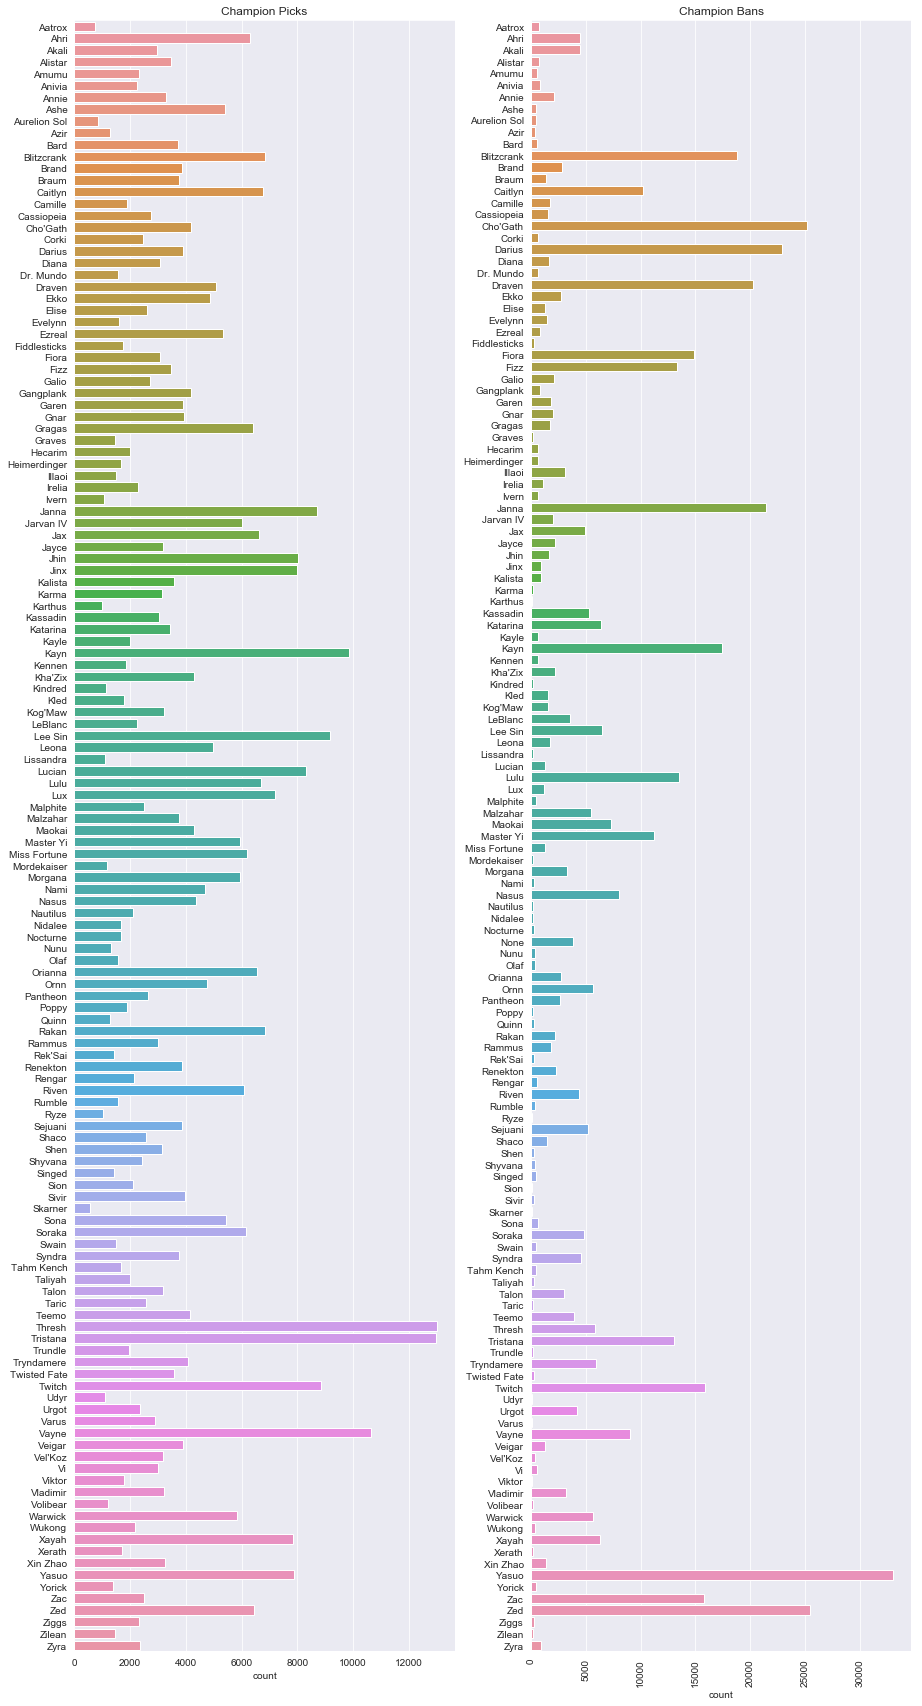

In [70]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,30))
plt.xticks(rotation=90)
sns.countplot(y=sortedPicks, data=data, ax=ax1)
sns.countplot(y=sortedBans, data=data, ax=ax2)
ax1.set_title('Champion Picks')
ax2.set_title('Champion Bans')

In [72]:
data.head(5)


,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tags,t1_champ2id_tags,t1_champ3id_tags,t1_champ4id_tags,t1_champ5id_tags,t2_champ1id_tags,t2_champ2id_tags,t2_champ3id_tags,t2_champ4id_tags,t2_champ5id_tags
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


In [86]:
# visualization
data.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tags,t1_champ2id_tags,t1_champ3id_tags,t1_champ4id_tags,t1_champ5id_tags,t2_champ1id_tags,t2_champ2id_tags,t2_champ3id_tags,t2_champ4id_tags,t2_champ5id_tags
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


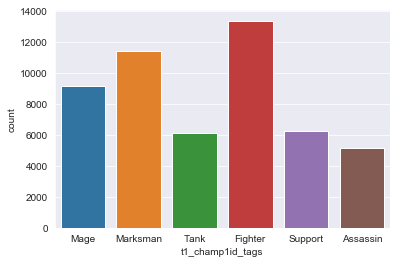

In [78]:
sns.countplot(x='t1_champ1id_tags',data=data)
#hue ??? 

In [81]:
#dataset=data['t1_champ1id_tags','t1_champ2id_tags','t1_champ3id_tags','t1_champ4id_tags','t1_champ5id_tags','t2_champ1id_tags','t2_champ2id_tags','t2_champ3id_tags','t2_champ4id_tags','t2_champ5id_tags'].value_counts().head()

In [109]:
data[sumSpellsCols].head()

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,t2_champ1_sum1,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2
0,Teleport,Flash,Exhaust,Flash,Flash,Heal,Smite,Ghost,Flash,Ignite,Smite,Flash,Flash,Heal,Ghost,Flash,Ignite,Flash,Flash,Exhaust
1,Heal,Flash,Teleport,Flash,Flash,Exhaust,Flash,Ignite,Flash,Smite,Flash,Teleport,Flash,Ignite,Smite,Flash,Flash,Ignite,Flash,Heal
2,Flash,Heal,Smite,Flash,Exhaust,Flash,Flash,Teleport,Teleport,Flash,Flash,Heal,Ignite,Flash,Flash,Teleport,Flash,Smite,Heal,Flash
3,Flash,Teleport,Flash,Ignite,Flash,Heal,Flash,Cleanse,Smite,Flash,Ignite,Flash,Smite,Flash,Flash,Exhaust,Flash,Ignite,Flash,Heal
4,Flash,Teleport,Smite,Flash,Flash,Exhaust,Flash,Heal,Heal,Flash,Exhaust,Flash,Flash,Teleport,Smite,Flash,Flash,Teleport,Flash,Heal


In [110]:
data[sumSpellsCols].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'